<h3 style="text-align: center;"><b>Бакалаврськая студія Штучний Інтелект, Київська школа економіка(KSE)</b></h3>

Бібліотека `pandas` активно використовується в сучасному Data Science для роботи з структурованими даними у в игляді таблиці(**.csv**, etc...)

# pd.Series

Тип даних pd.Series являє собою одновимірний набір даних.Дані, які пропущені, записуються, як `np.nan`; вони не беруть участі під час підрахувань.

### Створення
Створимо Series зі списку температур

In [ ]:
some_list = [1, 3, 5, np.nan, 6, 8]
ser_1 = pd.Series(some_list)
ser_1

In [ ]:
# Можна завчасно вказати індекси, щоб було зрічнше звертатись до елементів.
ind = ['1st day', '2nd day', '3rd day', '4th day', '5rd day', '6th day']

ser_2 = pd.Series(some_list, index=ind)
ser_2

In [ ]:
ser_2['4th day']

### Індексування
З індексами можна працювати, як в звичаному **list**.

In [ ]:
print(ser_2[0])

print('-----------')

print(ser_2[1:3])

print('-----------')

print(ser_2[::-1])

### сортування
Тип `pd.Series` можливо відсортувати за значеннями або по індексах.

In [ ]:
ser_2.sort_index()

In [ ]:
ser_3 = ser_2.sort_values()

In [ ]:
ser_3

### Операції з series
Тип `pd.Series` можна модифікувати простіше, ніж стандартний ``list`` з Python.

In [ ]:
ser_3 + 100

In [ ]:
np.exp(ser_3)

In [ ]:
term_1 = pd.Series(np.random.randint(0, 10, 5))
term_2 = pd.Series(np.random.randint(0, 10, 6))

term_1 + term_2

In [ ]:
term_1.shape

# pd.DataFrame

Тип даних pd.DataFrame являє собою двовимірну таблицю з даними. Має індекси і набір стовпців. Таблицю можна побудувати, наприклад, із словнику, значення, в якому є одновимірні набори даних.


In [ ]:
# Dataframe можна скласти зі словника. Ключ буде відповідати колонці.
some_dict = {'one': pd.Series([1,2,3], index=['a','b','c']),
             'two': pd.Series([1,2,3,4], index=['a','b','c','d']),
             'three': pd.Series([5,6,7,8], index=['a','b','c','d'])}
df = pd.DataFrame(some_dict)
df

In [ ]:
#Або, зі списку списків з аргументом columns

some_array = [[1,1,5], [2,2,6], [3,3,7], [np.nan, 4,8]]
df = pd.DataFrame(some_array, index=['a', 'b', 'c', 'd'], columns=['one', 'two', 'three'])
df

In [ ]:
df.values

In [ ]:
df.columns

In [ ]:
df.columns = ['first_column', 'second_column', 'third_column']
df.index = [1,2,3,4]
df

### Індексування 
Є дуже багато методів індексувати DataFrame в Pandas.

#### По колонках
Індексування по колонці повертає pd.Series. Можна вибирати не одну колонку, а декілька водночас. Тоді знову повернеться pd.DataFrame.

In [ ]:
first_column = df['first_column']
first_column

In [ ]:
df.first_column

In [ ]:
subset_dataframe = df[['first_column', 'second_column']]
subset_dataframe

In [ ]:
one_column_dataframe = df[['first_column']]
one_column_dataframe

#### По рядках
Можна писати будь-які слайси, як в Python-списці. Вони будуть застосовуватись до рядків. Неможна звератись по елементу!

In [ ]:
df[1] # не спрацює

In [ ]:
df[:1]

In [ ]:
df[1:4]

#### Універсальне індексування: .loc и .iloc

.loc і .iloc --- це два атрибута, як дозволяють індексувати по обох вісях одразу. Плутанини не виникає через фіксований порядок вісей.

In [ ]:
# По індексах: 
df.iloc[1:3, :2]

In [ ]:
df.loc[1:3, ['first_column', 'second_column']]

### Модифікації датасету, створення нових колонок
Можна просто брати і стоврювати нову колонку. Синтаксис тут досить нормальний.

In [ ]:
new_column = [5,2,1,4]
df['new_column'] = new_column
df

Аналогічно, можна застосовувати до окремих колонок арифметичні операції (оскільки колонки --- це Series!)

In [ ]:
df['first_column'] = df['first_column'] * 10
df

## Реальний датасет
Ми будемо працювати з датасетом ``Титанік``. Файли необхідно завантажити з kaggle.


### Читання з файлу
Обычно данные хранятся в виде таблиц в файлах формата .csv или .xlsx. На этом семинаре мы будем загружать данные из .csv файлов.


 
Загрузим первый файл

In [1]:
import pandas as pd

In [2]:
titanic_passengers = pd.read_csv('titanic.csv', index_col='PassengerId') # index_col=?

In [3]:
print('Всього пасажирів: ', len(titanic_passengers))
titanic_passengers.head(10)

Всього пасажирів:  891


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### Різна інформація про дата-сет

Можна дізнатись розмір таблиці, інформацію про значення таблиці, різні статистики по значеннях.

In [4]:
titanic_passengers.shape

(891, 11)

In [5]:
titanic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
titanic_passengers.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Завдання 1 
опишіть цей датасет: який розподіл жінок/чоловіків в ньому? Скільки пасажирів їхало в кожному класі? Який середній/мінімальний/максимальний вік пасажирів?

In [7]:
(titanic_passengers['Age'].min(), titanic_passengers['Age'].mean(), titanic_passengers['Age'].max())

(0.42, 29.69911764705882, 80.0)

In [8]:
titanic_passengers['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
titanic_passengers['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## Завдання 2
Сгрупуйте записи по класах пасажирів, в кожній групі порахуйте середній вік. Використовуйте метод ``pandas.DataFrame.groupby``.

In [12]:
titanic_passengers.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

## Злиття таблиць
Таиблиці можна об'єднувати декількома методами. Ми розгялнемо злиття по індексу: метод називається ``pd.join``.

In [16]:
# df_2 = pd.read_csv('titanic_surv.csv')
surv_link = 'https://www.dropbox.com/s/v35x9i6a1tc7emm/titanic_surv.csv?dl=1'
df_2 = pd.read_csv(surv_link)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [14]:
import numpy as np

In [ ]:
df_2.head()

### Завдання 3.
Об'єднайте два датасети по колонці індексу.

In [15]:
df_2.index = np.arange(1, 892)

NameError: name 'df_2' is not defined

In [ ]:
df_2 = df_2.sample(frac=1)
df_2.head()

In [ ]:
titanic_passengers = titanic_passengers.join(df_2)
titanic_passengers.head()

### Завдання 4. 
Скільки всього виживших пасажирів? Виживших пасажирів по кожній статі? П матробудуйте матрицю кореляцій факта виживання, статі і віку.

In [17]:
titanic_passengers['Survived'].sum()

342

In [18]:
titanic_passengers.groupby(['Sex'])['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [19]:
corr_data = titanic_passengers[['Sex', 'Age', 'Survived']]
corr_data['Sex'] = (corr_data['Sex'] == 'female').astype(int)

/var/folders/hc/w7sl68014h54q473z8hyv3y80000gn/T/ipykernel_2328/1666886436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data['Sex'] = (corr_data['Sex'] == 'female').astype(int)


In [20]:
corr_data.head()

,Sex,Age,Survived
PassengerId,,,
1,0,22.0,0
2,1,38.0,1
3,1,26.0,1
4,1,35.0,1
5,0,35.0,0


In [21]:
corr_data.corr()

,Sex,Age,Survived
Sex,1.000000,-0.093254,0.543351
Age,-0.093254,1.000000,-0.077221
Survived,0.543351,-0.077221,1.000000


In [22]:
import seaborn as sns

<AxesSubplot:>

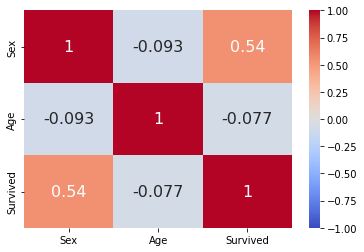

In [23]:
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, annot_kws={"size": 16})